In [32]:
!pip install xarray[io]
!pip install scipy

In [75]:
#@title List available species/models
import pandas as pd
import urllib.request

dataSummaryURL = 'https://coastwatch.pfeg.noaa.gov/erddap/tabledap/ECMM_density_query.csv'
availableDatums = {'density':'density','error':'standard_error','cv':'cv','d5':'a_5_percent','d95':'a_95_percent'}
req = urllib.request.urlretrieve(dataSummaryURL, "summary.csv")
df = pd.read_csv('summary.csv').dropna()
speciesList = df['species_common'].values
fileList = df['file_access_url'].values
print(speciesList)





['Atlantic spotted dolphin' 'Atlantic white sided dolphin' 'Blue whale'
 'Clymene dolphin' 'Common bottlenose dolphin' 'Common minke whale'
 'Cuviers beaked whale' 'Dwarf and pygmy sperm whales'
 'False killer whale' 'Fin whale' 'Frasers dolphin' 'Harbor porpoise'
 'Humpback whale' 'Killer whale' 'Melon headed whale'
 'Mesoplodont beaked whales' 'Northern bottlenose whale'
 'North Atlantic right whale' 'Pantropical spotted dolphin'
 'Pygmy killer whale' 'Rissos dolphin' 'Rough toothed dolphin' 'Seals'
 'Sei whale' 'Short beaked common dolphin' 'Sperm whale' 'Spinner dolphin'
 'Striped dolphin' 'Unidentified beaked whales' 'White beaked dolphin']


In [76]:
#@title Get metadata as python dictionary for specific species

species = 'Atlantic spotted dolphin'

import regex as re


def ncHeader_to_dict(file):
  varval_re = re.compile(r'(  :)(?P<var>[a-z,_]*) (=) (?P<val>.+);')
  meta = dict()
  with open(file, 'r') as f:
    for line in f.readlines():
      variableMatch = varval_re.match(line)
      if variableMatch:
        meta[variableMatch.group('var')] = variableMatch.group('val').replace("'",'').replace('"','')
  return meta

index = speciesList.tolist().index(species)
file = fileList[index].split('/')[0]
# read nc header and convert to dictionary
request = f'https://coastwatch.pfeg.noaa.gov/erddap/griddap/{file}.ncHeader'

req= urllib.request.urlretrieve(request, "header.txt")
meta = ncHeader_to_dict('header.txt')
print(meta)


{'acknowledgement': 'This project would not be possible without the contributions of many individuals and organizations. Above all, we acknowledge the work of those who collected, processed, and shared marine mammal and covariate data with us, and to those who funded the production of those data. In particular, we thank the observers, pilots, ship captains, and crew who collected the marine mammal observations that form the core of this analysis. Tables 4, 5, and 6 (See referenced citation Roberts et al. 2023) list the collaborating institutions, survey programs, and citations for marine mammal surveys used for the EC models. Tables 10 and 11 (See referenced citation Roberts et al. 2023) list those that were additionally used for the AFTT models. Table 2 (See referenced citation Roberts et al. 2023) lists the data sources and citations for covariates used in both models. Thank you all for the opportunity to analyze the data you produced; we hope you find this project a satisfactory out

In [77]:
#@title download specific subset of data in any format

datum = availableDatums['density']


# see erddap for more formats, examples include .nc, .mat, .csv, .geotiff
format = 'nc'
# region of interest
minLat, maxLat = (38.1,41.0)
minLon, maxLon = (-74.0,-70.0)


file = fileList[index].split('/')[0]
request = f'https://coastwatch.pfeg.noaa.gov/erddap/griddap/{file}.{format}?{datum}%5B({meta["time_coverage_start"]}):1:({meta["time_coverage_end"]})%5D%5B({maxLat:.5f}):1:({minLat:.5f})%5D%5B({minLon:.5f}):1:({maxLon:.5f})%5D'

req= urllib.request.urlretrieve(request, f"ECMMdata.{format}")

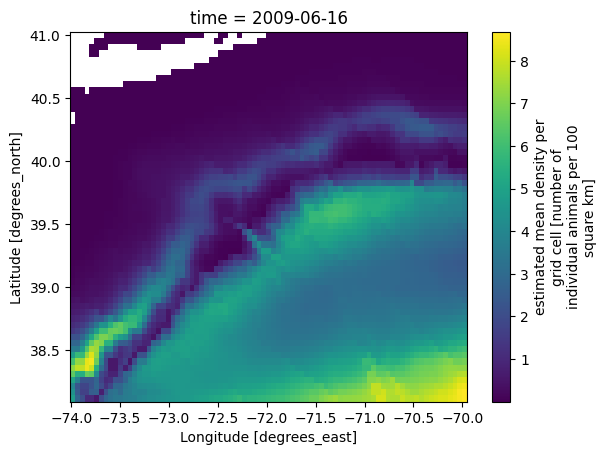

In [86]:
#@title open and plot dataset with xarray

import xarray as xr

ds = xr.open_dataset(f"ECMMdata.{format}")
ds.density.isel(time=5).plot()